#### Analysis of a single stock

Goal: Take 1 stock and run a trendline through 1 year. Assess the theoretical performance of adjusting weekly contributions as compared to contributing a consistent amount every week.

This is a strategy thought up by someone who admittedly knows almost nothing about long term stock trading. Determine points in time where the stock is underperforming and opt to buy in. This would only work for stocks you believe will rise in the long term.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [3]:
# Master list for use throughout the script

lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

In [4]:
# Pull the closing data
# tickers list needs to match 'lista'

data = yf.download(
        tickers = 'AAPL, AMD, AMZN, CRM, GOOG, INTC, MSFT, NVDA, QQQ, SBUX, SQ, TSLA, TSM',
        period = '1y',
        #group_by = 'ticker'
    )

df = data['Close']
df = df.dropna() #in case the first row generates as nulls
df

[*********************100%***********************]  13 of 13 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
Date,,,,,,,,,,,,,
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,166.660004,475.049988,81.550003
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,162.880005,447.369995,82.169998
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,152.860001,407.000000,81.180000
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004
2020-09-08,112.820000,78.690002,3149.840088,241.270004,1532.390015,48.910000,202.660004,119.129997,269.950012,85.410004,139.110001,330.209991,77.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,262.130005,701.159973,118.099998
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,268.010010,711.919983,118.489998
2021-08-30,153.119995,111.320000,3421.570068,264.970001,2909.389893,53.939999,303.589996,226.880005,380.260010,115.610001,271.920013,730.909973,118.989998


In [5]:
# add index to df

df['Index'] = range(1,len(df)+1)
df

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,166.660004,475.049988,81.550003,1
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,162.880005,447.369995,82.169998,2
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,152.860001,407.000000,81.180000,3
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004,4
2020-09-08,112.820000,78.690002,3149.840088,241.270004,1532.390015,48.910000,202.660004,119.129997,269.950012,85.410004,139.110001,330.209991,77.320000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,262.130005,701.159973,118.099998,249
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,268.010010,711.919983,118.489998,250
2021-08-30,153.119995,111.320000,3421.570068,264.970001,2909.389893,53.939999,303.589996,226.880005,380.260010,115.610001,271.920013,730.909973,118.989998,251


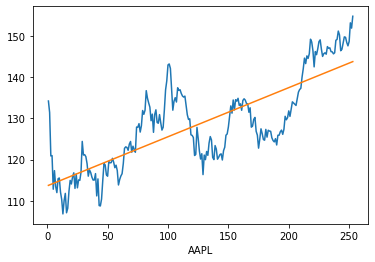

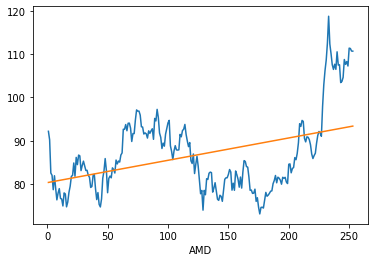

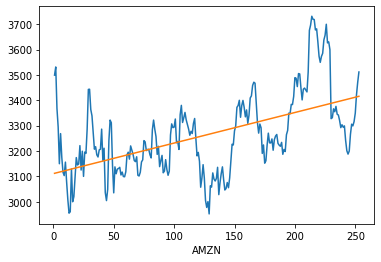

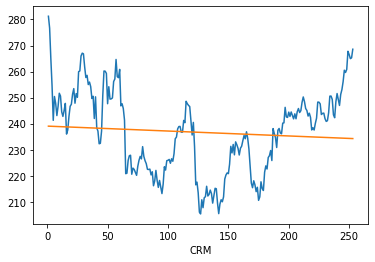

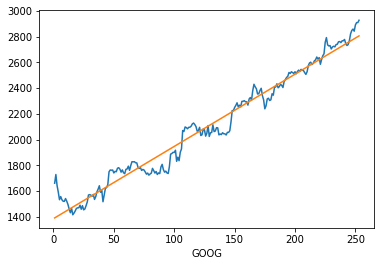

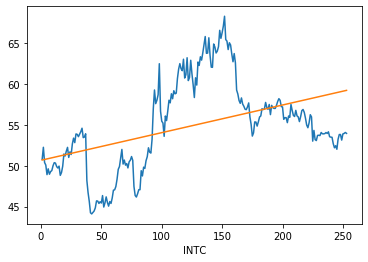

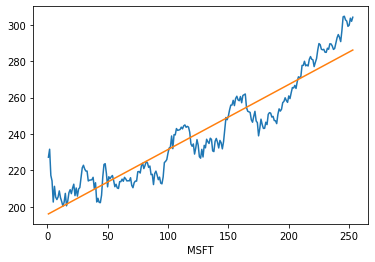

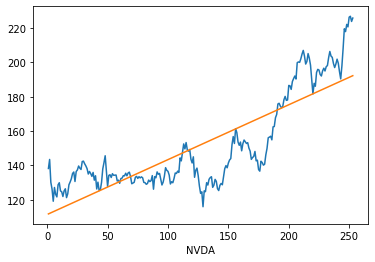

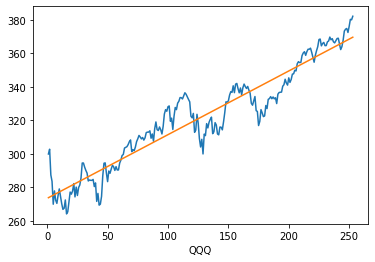

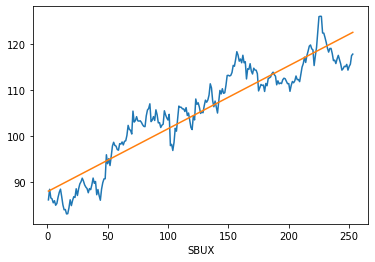

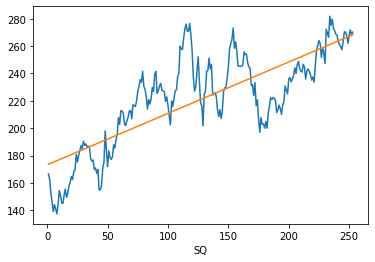

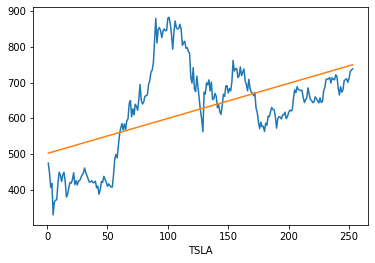

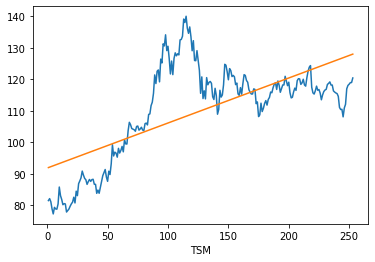

In [6]:
# plot data with trendlines

for i in lista:
    x = df['Index']
    y = df[i]

    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.xlabel(i)
    plt.show()

In [7]:
# create pred and pred/close list

for e in lista:
    nlist = []
    ylist = []
    y = df[str(e)]
    
    for i in range(1,len(df)+1):
        x = df['Index']
        m, b = np.polyfit(x, y, 1)
        d = m*i+b
        nlist.append(d)
        
    df[str(e) + ' pred'] = nlist
    df['temp pred'] = nlist
    df['temp'] = df[str(e)]

    for i in range(1,len(df)+1):
        d = (df['temp pred'].iloc[i-1])/(df['temp'].iloc[i-1])
        ylist.append(d)

    df[str(e) + ' pred/close'] = ylist

df

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,...,273.838442,0.913038,87.953538,1.022121,173.715921,1.042337,502.963385,1.058759,92.025458,1.128454
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,...,274.218400,0.905729,88.090826,0.997067,174.091250,1.068831,503.944250,1.126460,92.168325,1.121679
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,...,274.598357,0.955424,88.228114,1.020214,174.466579,1.141349,504.925116,1.240602,92.311191,1.137117
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,...,274.978315,0.969668,88.365401,1.024289,174.841908,1.194357,505.905982,1.209376,92.454057,1.171639
2020-09-08,112.820000,78.690002,3149.840088,241.270004,1532.390015,48.910000,202.660004,119.129997,269.950012,85.410004,...,275.358273,1.020034,88.502689,1.036210,175.217237,1.259559,506.886847,1.535044,92.596923,1.197580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,...,368.067975,0.988314,122.000868,1.067187,266.797545,1.017806,746.218052,1.064262,127.456278,1.079223
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,...,368.447933,0.979810,122.138156,1.060964,267.172874,0.996876,747.198918,1.049555,127.599145,1.076877
2021-08-30,153.119995,111.320000,3421.570068,264.970001,2909.389893,53.939999,303.589996,226.880005,380.260010,115.610001,...,368.827891,0.969936,122.275443,1.057655,267.548204,0.983922,748.179783,1.023628,127.742011,1.073553


In [8]:
# For each stock, print the most recent predition/close ratio based on 1 year of data
# higher than 1 = the stock is currently lower than predicted
# less than 1 = the stock is currently higher than predicted

print ('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

nlist = []

for e in lista:
    nlist.append(round(df[str(e) + ' pred/close'].iloc[len(df)-1],4))
    
final = pd.DataFrame(lista, columns=['stock'])
temp1 = pd.DataFrame(nlist, columns=['pred/close'])
final['pred/close'] = temp1
final = final.sort_values(by='pred/close', ascending = False)

final

Current date/time:  September 01, 2021 07:30:19



,stock,pred/close
5,INTC,1.0974
12,TSM,1.0628
9,SBUX,1.0402
11,TSLA,1.0155
10,SQ,0.9930
2,AMZN,0.9727
8,QQQ,0.9673
4,GOOG,0.9584
6,MSFT,0.9408
0,AAPL,0.9290
